In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm
import seaborn as sns

from statsmodels.regression.linear_model import OLS

sns.set(rc = {"figure.figsize":(16, 16)})

/tmp/ipykernel_46708/144865063.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def df_OLS_anal(df: pd.DataFrame, mode = 0):
    if(len(df) == 0):
        print("empty df")
        return 0, 0, 0, 0 
    if(mode == 0):
        deltaA = np.array(df["AskAfter"] - df["AskBefore"])[1:-1]
    else:
        deltaA = np.array(df["AskAfterMany"] - df["AskBeforeMany"])[1:-1]

    deltat = np.array(np.diff(df["Time"]))[1:]
    x = np.array(df["Volume"][1:-1])

    dA = np.array(deltaA / deltat)
    dx = np.array(x / deltat)
    ddx = np.array(np.diff(dx))
    ddA = np.array(np.diff(dA))

    OLSdf = pd.DataFrame({
        "SUM": ddA,
        "-rho": deltaA[:-1],
        "-rho kappa": x[1:],
        "rho (lambda + kappa)": x[:-1],
        "kappa + lambda": ddx
    })

    Regressand = OLSdf["SUM"]

    Regressors = OLSdf[["-rho", "-rho kappa", "rho (lambda + kappa)", "kappa + lambda"]]


    # Regressors = sm.add_constant(Regressors, prepend=False)

    model = OLS(Regressand, Regressors)

    res = model.fit()

    # print(res.summary()) 

    # print(res.bse[0])

    rho = - res.params.iloc[0]
    kappa = - res.params.iloc[1] / rho
    lamb = res.params.iloc[2] / rho - kappa
    # lamb2 = res.params.iloc[3] - kappa
    

    # print("rho = ", rho, "\nlambda = ", lamb, "\nkappa = ", kappa, "\n \n", end="")

    return rho, kappa, lamb, res.bse.iloc[0]


In [3]:
def df_OLS_anal2(df: pd.DataFrame, mode = 0):
    if(mode == 0):
        deltaA = np.array(df["AskAfter"] - df["AskBefore"])[1:-1]
    else:
        deltaA = np.array(df["AskAfterMany"] - df["AskBeforeMany"])[1:-1]
        
    deltat = np.array(np.diff(df["Time"]))[1:]
    x = np.array(df["Volume"][1:-1])

    dA = np.array(deltaA / deltat)
    dx = np.array(x / deltat)
    ddx = np.array(np.diff(dx))
    ddA = np.array(np.diff(dA))

    OLSdf = pd.DataFrame({
        "SUM": ddA,
        "-rho": deltaA[:-1],
        "-rho kappa": np.diff(x),
        "rho lambda": x[:-1],
        "kappa + lambda": ddx
    })

    Regressand = OLSdf["SUM"]

    Regressors = OLSdf[["-rho", "-rho kappa", "rho lambda", "kappa + lambda"]]


    # Regressors = sm.add_constant(Regressors, prepend=False)

    model = OLS(Regressand, Regressors)

    res = model.fit()

    print(res.summary()) 

    rho = - res.params.iloc[0]
    kappa = - res.params.iloc[1] / rho
    lamb = res.params.iloc[2] / rho - kappa
    # lamb2 = res.params.iloc[3] - kappa
    

    print("rho = ", rho, "\nlambda = ", lamb, "\nkappa = ", kappa, "\n \n", end="")

    return rho, kappa, lamb, res.bse.iloc[0]


In [4]:
def df_OLS_anal3(df: pd.DataFrame, mode = 0):
    if(mode == 0):
        deltaA = np.array(df["AskAfter"] - df["AskBefore"])[1:-1]
    else:
        deltaA = np.array(df["AskAfterMany"] - df["AskBeforeMany"])[1:-1]
        
    deltat = np.array(np.diff(df["Time"]))[1:]
    x = np.array(df["Volume"][1:-1])

    dA = np.array(deltaA / deltat)
    dx = np.array(x / deltat)
    ddx = np.array(np.diff(dx))
    ddA = np.array(np.diff(dA))

    dummy_first = np.array((df["Time"] < 3600)[1:-2], dtype=float)
    dummy_last = np.array((df["Time"] > 27500)[1:-2], dtype=float)

    OLSdf = pd.DataFrame({
        "SUM": ddA,
        "-rho": deltaA[:-1],
        "-rho kappa": x[1:],
        "rho (lambda + kappa)": x[:-1],
        "kappa + lambda": ddx,
        "first hour": dummy_first,
        "last hour": dummy_last
    })

    Regressand = OLSdf["SUM"]

    Regressors = OLSdf[["-rho", "-rho kappa", "rho (lambda + kappa)", "kappa + lambda","first hour", "last hour" ]]


    # Regressors = sm.add_constant(Regressors, prepend=False)

    model = OLS(Regressand, Regressors)

    res = model.fit()

    print(res.summary()) 

    rho = - res.params.iloc[0]
    kappa = - res.params.iloc[1] / rho
    lamb = res.params.iloc[2] / rho - kappa
    # lamb2 = res.params.iloc[3] - kappa
    

    print("rho = ", rho, "\nlambda = ", lamb, "\nkappa = ", kappa, "\n \n", end="")

    return rho, kappa, lamb, res.bse.iloc[0]


In [13]:
file = "data/CU/20210303/USD000UTSTOMWP.csv"
df = pd.read_csv(file)
params = []
delta = 3600
N = int(53000/delta)
# print(N)
for i in range(1, N):
    params.append((np.array(
        df_OLS_anal(
            df[(df["Time"] > 36000 + (i-1) * delta) & (df["Time"] < 36000 + i * delta)].iloc[:, :]
            ))))

i = 10.0
for p in params:
    print(str(i) + "-" + str(i + delta / 3600) +": ", p[0], p[-1])
    i += delta / 3600


10.0-11.0:  48.760780007683344 46.783160722839135
11.0-12.0:  0.10278236762839765 6.3023541371473355
12.0-13.0:  0.5612654818009 0.03065182441647591
13.0-14.0:  20016.07207965531 1149.6465833783982
14.0-15.0:  8229.938227405415 1019.0914230700412
15.0-16.0:  4751.6413836774345 781.686798292469
16.0-17.0:  1871.1476730974161 361.6312804299318
17.0-18.0:  136.02041194221962 102.14645459193922
18.0-19.0:  47.87856823419502 51.5068634793171
19.0-20.0:  585.030674221585 231.97349496206724
20.0-21.0:  2.1317127862765766 18.953766667786375
21.0-22.0:  1.7262432698883055 0.05044267765691108
22.0-23.0:  7.587694339744785 0.35247914062466956


In [18]:
file = "data/CU/20210303/USD000UTSTOMWP.csv"
df = pd.read_csv(file)

In [19]:
for index, row in df.iterrows():
    df.loc[index, 'Time'] = int(df.loc[index, 'Time'])

In [21]:
max = len(df)
for index, row in df.iterrows():
    if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < 1e-1:
        # print(index)
        df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
        df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
        df = df.drop([index])
df = df.reset_index()
df = df.drop(["index"], axis=1)

In [24]:
file = "data/CU/20210303/USD000UTSTOMWP.csv"
df = pd.read_csv(file)

for index, row in df.iterrows():
    df.loc[index, 'Time'] = int(df.loc[index, 'Time'])

max = len(df)
for index, row in df.iterrows():
    if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < 1e-1:
        # print(index)
        df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
        df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
        df = df.drop([index])
df = df.reset_index()
df = df.drop(["index"], axis=1)

print(df_OLS_anal(df))
print(print(len(df)))
df.to_csv("USDUTSTOM_aggr.csv")

(0.4586780846417154, 1.9154617699116554e-10, 4.5336368780763117e-10, 0.005305360972350477)
17482
None


In [8]:
directory = "data/SE/"
files = os.listdir(directory)
fout = open("output.txt", mode="w+")
listoflistq = []
#, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.5, 0.75, 0.9, 0.95, 1.0, 1.05
for delta in [1e-6]:
    listQuadras = []
    for file in files:
        if(file.endswith(".csv")):
            print("data/"+file)
            df = pd.read_csv(directory + file)
            df["Time"] = df["Time"] / (60 * 60 * 24)
            # df = df[df["AskAfter"] - df["AskBefore"] >=0 ]

            # if abs(delta - 2) < 0.5:
            #     df["AskAfter"] = df["AskAfter"] / np.mean(df["AskAfter"])
            #     df["AskBefore"] = df["AskBefore"] / np.mean(df["AskBefore"])
            #     df["AskAfterMany"] = df["AskAfterMany"] / np.mean(df["AskAfterMany"])
            #     df["AskBeforeMany"] = df["AskBeforeMany"] / np.mean(df["AskBeforeMany"])


            max = len(df)
            for index, row in df.iterrows():
                if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < delta:
                    df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
                    df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
                    df = df.drop([index])
            df = df.reset_index()
            df = df.drop(["index"], axis=1)

            # df = df[df["AskAfter"] - df["AskBefore"] >=0 ]

            lil = len(df[df["AskAfter"] - df["AskBefore"] <=0 ])
            me = np.mean(df["Volume"])
            spikes = len(df[((df["AskAfter"] - df["AskBefore"] > 0) & (df["Volume"] < me))])
            rho, kappa, lambd, se =         df_OLS_anal(df)
            rho1, kappa1, lambd1, se1 = df_OLS_anal(df, 1)
            vol = sum(df["Volume"])
            pr = sum(df["Volume"] * df["AskBefore"])
            # print(rho, rho1)
            total = len(df)
            listQuadras.append(np.array(
                [
                delta,
                file[:-6],
                len(df)
                ,total
                ,lil/len(df)
                ,vol
                ,pr
                ,lil
                # ,spikes
                # ,me * 1e1
                , lil/total
                , spikes/(total - lil)
                , rho
                , se
                , rho1
                , se1
                ]
                # len(df[df["AskAfter"] - df["AskBefore"] <= 0  & df["Volume"] > 1e5])
                ))
    listQuadras.sort(key=lambda x: float(x[2]))
    listoflistq.append(listQuadras[::-1])

fout.close()

data/ROSNWP.csv
                                 OLS Regression Results                                
Dep. Variable:                    SUM   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.178
Method:                 Least Squares   F-statistic:                              375.3
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                   7.08e-293
Time:                        19:49:46   Log-Likelihood:                         -94906.
No. Observations:                6903   AIC:                                  1.898e+05
Df Residuals:                    6899   BIC:                                  1.898e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [11]:
fout = open("outputNA_SE.txt", mode="w+")
printed = []

for unit in listoflistq:
    # unit.sort(key=lambda x: x[4])
    # print(unit)
    # print(unit[0][0])
    if not unit[0][0] in printed:
        fout.write("\n")
        printed.append(unit[0][0])
        fout.write(" \\begin\{table\}[h!] \n\\begin\{center\} \n\\begin\{tabular\}\{|c|c|c|c|c|c|\} \n\\hline \nИнструмент        & Число сделок & $B$ & $B ^*$ \\\\ \\hline")
        for j in range(len(unit)):
            rhostds = np.round((unit[j][-4:]).astype(float), 3).astype(str)
            fout.write(" & $".join((unit[j][1:3]))  
                       + "$ & $" + rhostds[0] + " \pm " + rhostds[1] 
                       + "$ & $" + rhostds[2] + " \pm " + rhostds[3] + "$ \\\\ \hline \n")
        
        fout.write("\end\{tabular\} \n\\end\{center\}\\caption\{$B$ и $B ^*$, вычисленные для разных валютных пар в агрегированном датасете (величина промежутка" 
                       + unit[j][0] +").\} \n\\label\{Aggreg1CU" + unit[j][0] +"\} \\end\{table\} \n ") 
            # fout.write(" & ".join(unit[j][1:]) + "\\\\hline \n")


fout.close()

In [100]:
listoflistq[0][0][0]

'1e-06'

In [10]:
listQuadras = listoflistq[10]
listQuadras.sort(key=lambda x: float(x[1]))
for q in listQuadras[::-1]:
    l = np.array([q[0]
                  , q[1]
                #   ,round(float(q[1] ))
                #   ,round(float(q[2] ))
                #   ,round(float(q[3] ))
                #   ,round(float(q[-4]) * 100) 
                #   ,round(float(q[-2]))
                #   ,round(float(q[-1])) 
                  ,round(float(q[-4]), 4) ,round(float(q[-3]), 4) ,round(float(q[-2]), 4) ,round(float(q[-1]), 4)
                     ])
    an = ""
    i = 0
    for num in l:
        if i == 0:
            an += (num + " & $")
            i =1
            continue
        an += '%.3e' % float(num)
        an += "$ & $"
    an += " \\\\ \hline"
    print(" & ".join(l) +" \\\\ \hline")

ValueError: could not convert string to float: 'GBPRUB_TOD'

In [75]:
listoflistq

[[array(['MTLR', '0.7150413983440662', '6608', '1213428.0',
         '1214012.971068016', '3109', '0.47049031476997577',
         '0.3400971706201772', '0.39091549692874256',
         '0.0063856273039835905', '0.3537593958030661',
         '0.007981948950676476'], dtype='<U32'),
  array(['PLZL', '0.785491640691414', '9683', '206901.0',
         '206890.09896091482', '2772', '0.2862749147991325',
         '0.08623932860656924', '0.7049827509313987',
         '0.012596623671535672', '0.22880121772841763',
         '0.007081831950783042'], dtype='<U32'),
  array(['SNGSP', '0.8279742765273312', '6367', '17946500.0',
         '17949942.604059834', '3090', '0.4853149049787969',
         '0.16509002136100093', '0.16702556137925278',
         '0.006229853937236403', '0.20681683866825848',
         '0.005632936372960533'], dtype='<U32'),
  array(['LKOH', '0.8390075014425851', '11777', '779926.0',
         '780025.8353177122', '4362', '0.3703829498174408',
         '0.09413351314902225', '0.3026

In [67]:
1
SBER & 27.9707 & 0.3466 & 16.4545 & 0.1786 \\ \hline
GAZP & 14.4957 & 0.2154 & 26.9744 & 0.4215 \\ \hline
VTBR & 38.4984 & 0.4718 & 29.0294 & 0.3672 \\ \hline
YNDX & 21.3755 & 0.2992 & 17.7431 & 0.3176 \\ \hline
MGNT & 24.1286 & 0.4092 & 15.6964 & 0.3867 \\ \hline
LKOH & 17.6197 & 0.3002 & 12.864 & 0.2777 \\ \hline
ROSN & 11.2913 & 0.259 & 17.9888 & 0.429 \\ \hline
PLZL & 41.7367 & 0.754 & 12.6077 & 0.4184 \\ \hline
MTLR & 22.4296 & 0.386 & 21.3811 & 0.4789 \\ \hline
SNGSP & 8.6528 & 0.3831 & 11.2409 & 0.3351 \\ \hline
1e-4
SBER & 2659.28 & 46.6529 & 2087.8209 & 27.105 \\ \hline
GAZP & 1903.6566 & 45.6387 & 8364.7766 & 147.4553 \\ \hline
YNDX & 1504.4396 & 47.7253 & 4025.141 & 115.8205 \\ \hline
MGNT & 1173.8784 & 55.9399 & 5106.4422 & 195.0004 \\ \hline
LKOH & 18454.7692 & 391.8265 & 8962.5063 & 221.2938 \\ \hline
ROSN & 3951.5642 & 155.4269 & 4744.0315 & 195.9325 \\ \hline
PLZL & 692.9721 & 35.1546 & 7490.2137 & 269.9497 \\ \hline
MTLR & 313.5338 & 12.9488 & 2002.8463 & 143.931 \\ \hline
SNGSP & 530.413 & 128.9895 & 6237.9549 & 260.9592 \\ \hline
1e-3
SBER & 715.3168 & 8.1087 & 1331.4543 & 13.3604 \\ \hline
GAZP & 685.1829 & 9.6608 & 299.1781 & 6.1878 \\ \hline
YNDX & 673.4836 & 15.2766 & 472.9946 & 10.6522 \\ \hline
MGNT & 848.4473 & 19.9525 & 166.0453 & 7.545 \\ \hline
LKOH & 850.9708 & 18.6709 & 408.2363 & 14.1038 \\ \hline
ROSN & 285.2226 & 11.2774 & 605.8246 & 19.7894 \\ \hline
PLZL & 937.9644 & 34.9427 & 572.6787 & 21.5933 \\ \hline
MTLR & 232.5275 & 6.9747 & 249.4449 & 10.6362 \\ \hline
SNGSP & 51.5898 & 8.7723 & 200.4885 & 15.6683 \\ \hline
1e-6
SBER & 97.5925 & 4.6488 & 199.027 & 18.7763 \\ \hline
GAZP & 103.3835 & 19.2493 & 2771.917 & 208.6554 \\ \hline
YNDX & 99.7543 & 7.6351 & 2809.5153 & 188.4444 \\ \hline
MGNT & 461.9422 & 65.2874 & 17496.0246 & 789.3491 \\ \hline
LKOH & 497.5336 & 58.9573 & 10904.3179 & 427.261 \\ \hline
ROSN & 100.6208 & 12.0217 & 1768.383 & 112.7616 \\ \hline
PLZL & 17.4061 & 18.5405 & 10693.1295 & 612.4833 \\ \hline
MTLR & 5.392 & 4.1462 & 882.8717 & 106.0638 \\ \hline
SNGSP & 363.3444 & 100.9974 & 1936.8162 & 117.781 \\ \hline

# from math import round
listQuadras.sort(key=lambda x: float(x[3]))
for q in listQuadras[::-1]:
    l = np.array([q[0]
                  # ,round(float(q[1] ))
                  # ,round(float(q[2] ))
                  # ,round(float(q[3] ))
                #   ,round(float(q[-4]) * 100) 
                #   ,round(float(q[-2]))
                #   ,round(float(q[-1])) 
                  ,round(float(q[-4]), 4)
                  ,round(float(q[-3]), 4)
                  ,round(float(q[-2]), 4)
                  ,round(float(q[-1]), 4)
                     ])
    an = ""
    i = 0
    for num in l:
        if i == 0:
            an += (num + " & $")
            i =1
            continue
        an += '%.3e' % float(num)
        an += "$ & $"
    an += " \\\\ \hline"
    print(" & ".join(l) +" \\\\ \hline")
    # print(an)

SBER & 0.7744 & 0.0063 & 0.9337 & 0.0072 \\ \hline
GAZP & 0.8641 & 0.0086 & 0.7051 & 0.0082 \\ \hline
LKOH & 0.4757 & 0.0078 & 0.433 & 0.009 \\ \hline
YNDX & 0.773 & 0.0095 & 0.435 & 0.0072 \\ \hline
PLZL & 0.2234 & 0.0056 & 0.4871 & 0.0122 \\ \hline
ROSN & 0.3116 & 0.0076 & 0.7418 & 0.012 \\ \hline
MGNT & 0.7336 & 0.0113 & 0.4186 & 0.0095 \\ \hline
SNGSP & 0.1842 & 0.0084 & 0.3528 & 0.0099 \\ \hline
MTLR & 0.5591 & 0.0092 & 0.5574 & 0.0112 \\ \hline


In [ ]:
y = 1
def f(x):
    x - x * np.log(x) + np.exp(-y / x) + y - 2

In [2]:
def solve_eq(f, a, b, delta=0.001):
    
    y_a = f(a)
    y_b =  f(b)
    direction = f(b) - f(a)
    
    if not y_a*y_b<0:
        print("нарушены условия разных знаков точек")
        return None
    
    dif = b-a       
    while dif>delta:
        # import pdb; pdb.set_trace()
        c = a+(b-a)/2
        y = f(c)
        if y==0:
            return c
        if y*direction > 0:
            b=c
        else:
            a = c
        dif = b-a
        
    return b

/tmp/ipykernel_45182/528316293.py:2: RuntimeWarning: divide by zero encountered in log
  return x - x * np.log(x) + np.exp(-y / x) + y - 2
/tmp/ipykernel_45182/528316293.py:2: RuntimeWarning: invalid value encountered in multiply
  return x - x * np.log(x) + np.exp(-y / x) + y - 2
/tmp/ipykernel_45182/528316293.py:2: RuntimeWarning: divide by zero encountered in divide
  return x - x * np.log(x) + np.exp(-y / x) + y - 2
/tmp/ipykernel_45182/528316293.py:2: RuntimeWarning: invalid value encountered in divide
  return x - x * np.log(x) + np.exp(-y / x) + y - 2


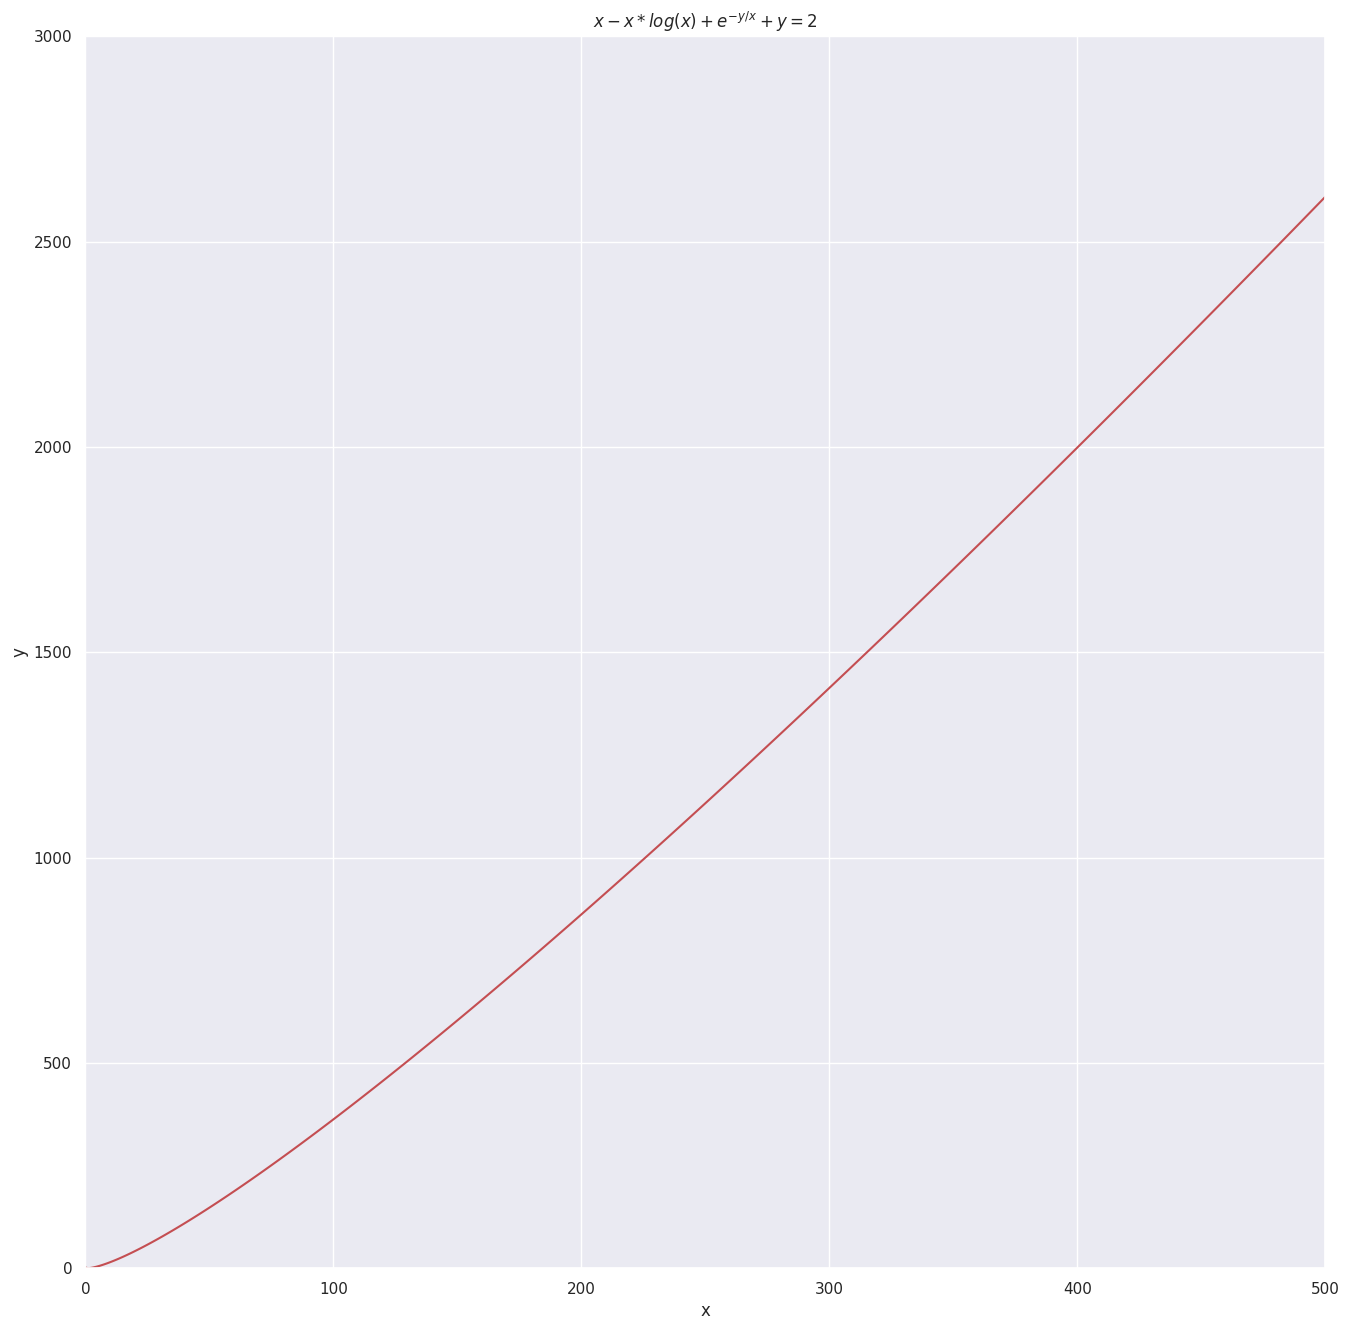

In [5]:
def implicit_function(x, y):
    return x - x * np.log(x) + np.exp(-y / x) + y - 2
    # return x**2 + y**2 - 3

x = np.linspace(0, 500, 5000)
y = np.linspace(0, 3000, 5000)
# x = np.linspace(-2, 2, 10)
# y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)

Z = implicit_function(X, Y)

plt.contour(X, Y, Z, levels=[0], colors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"$x - x * log(x) + e^{-y/x} + y = 2$")
plt.savefig("tBy.pdf")
plt.show()


/tmp/ipykernel_45182/3659378583.py:2: RuntimeWarning: divide by zero encountered in log
  return x - x * np.log(x) + np.exp(-y ) + x*y - 2
/tmp/ipykernel_45182/3659378583.py:2: RuntimeWarning: invalid value encountered in multiply
  return x - x * np.log(x) + np.exp(-y ) + x*y - 2


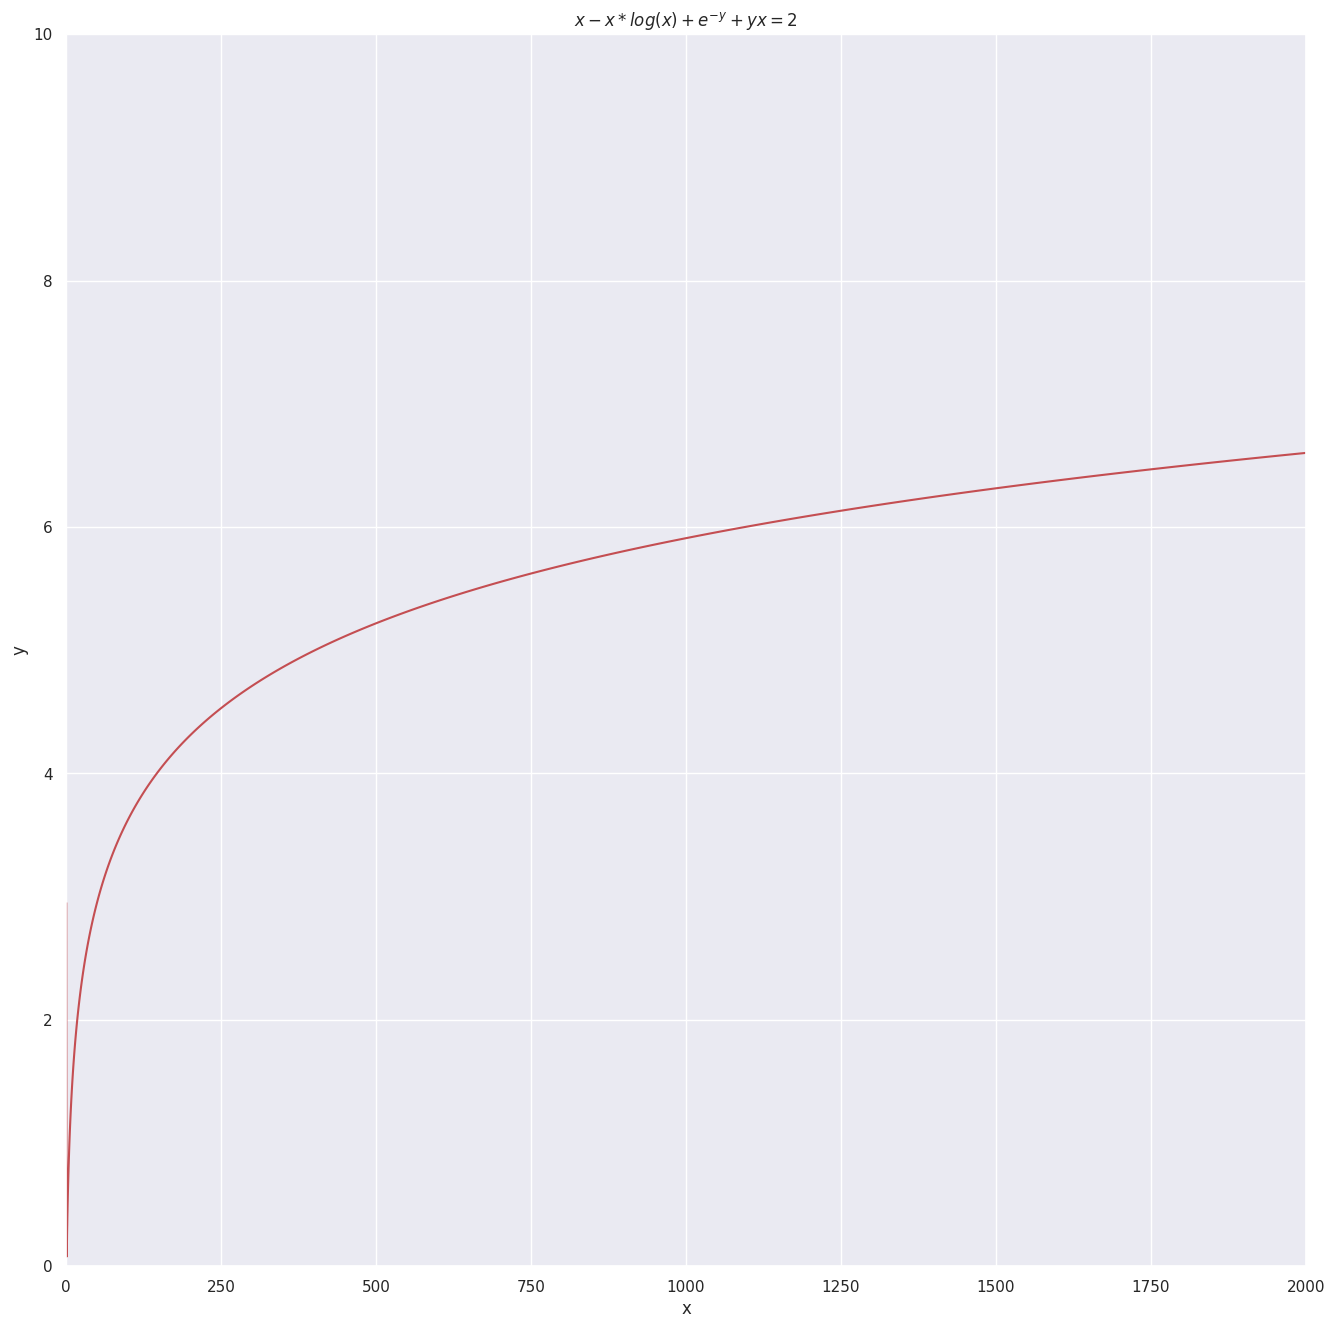

In [7]:
def implicit_function(x, y):
    return x - x * np.log(x) + np.exp(-y ) + x*y - 2
    # return x**2 + y**2 - 3

x = np.linspace(0, 2000, 5000)
y = np.linspace(0, 10, 5000)
# x = np.linspace(-2, 2, 10)
# y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)

Z = implicit_function(X, Y)

plt.contour(X, Y, Z, levels=[0], colors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"$x - x * log(x) + e^{-y} + yx = 2$")
plt.savefig("trhoy.pdf")
plt.show()

In [17]:
y = 10
solve_eq(EqGen(y), 0.01, 100)

0.1557068634033203

In [4]:
f = lambda x: x**2 - 2

print(solve_eq(f,0, 5))

1.414794921875


In [21]:
directory = "data/CU/03.03.2021/"
 
files = os.listdir(directory)

listQuadras = []

for file in files:
    if(file.endswith(".csv")):
        print("data/"+file)
        df = pd.read_csv(directory + file)
        total = len(df)
        lil = len(df[df["AskAfter"] - df["AskBefore"] <=0 ])
        me = np.mean(df["Volume"])
        spikes = len(df[((df["AskAfter"] - df["AskBefore"] > 0) & (df["Volume"] < me))])

        max = len(df)
        for index, row in df.iterrows():
            if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < 1e-3:
                # print(index)
                df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
                df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
                df = df.drop([index])

        df = df.reset_index()
        df = df.drop(["index"], axis=1)

        rho, kappa, lambd =    df_OLS_anal2(df)
        rho1, kappa1, lambd1 = df_OLS_anal2(df, 1)
                  
        listQuadras.append(np.array(
            [
            file[:-6]
            ,total
            ,lil
            # ,spikes
            # ,me * 1e1
            , lil/total
            , spikes/(total - lil)
            , rho
            , rho1
            ]
            # len(df[df["AskAfter"] - df["AskBefore"] <= 0  & df["Volume"] > 1e5])
            ))

listQuadras.sort(key=lambda x: int(x[1]))
print(listQuadras)

data/EUR_RUB__TODWP.csv
                                 OLS Regression Results                                
Dep. Variable:                    SUM   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              297.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                   5.89e-204
Time:                        14:43:22   Log-Likelihood:                          7615.3
No. Observations:                2149   AIC:                                 -1.522e+04
Df Residuals:                    2145   BIC:                                 -1.520e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [22]:
# from math import round
for q in listQuadras[::-1]:
    l = np.array([q[0]
                  ,round(float(q[1] ))
                #   ,round(float(q[-4]) * 100) 
                #   ,round(float(q[-2]))
                #   ,round(float(q[-1])) 
                  ,float(q[-2])
                  ,float(q[-1])
                     ])
    print(" & ".join(l) +" \\\\ \hline")
    # print(q)

USD000UTSTOM & 28361 & 0.4586605825254843 & 0.5992651640825155 \\ \hline
USD000000TOD & 9624 & 0.1988686390027684 & 0.16090594730894867 \\ \hline
EUR_RUB__TOM & 4021 & 0.2326587382094915 & 0.1493696053845097 \\ \hline
EUR_RUB__TOD & 2535 & 0.1932051710115114 & 0.2267376927870456 \\ \hline
CNYRUB_TOM & 371 & 0.03590525456327961 & 0.010948875773766412 \\ \hline
GBPRUB_TOM & 220 & 0.01454917489907815 & 0.002305257888834277 \\ \hline
CNY000000TOD & 55 & 0.056243043529142986 & 0.13524851802804994 \\ \hline
GBPRUB_TOD & 38 & -0.061153208531235986 & 0.08165224510375016 \\ \hline


In [20]:
# from math import round
for q in listQuadras[::-1]:
    l = np.array([q[0]
                  ,round(float(q[1] ))
                #   ,round(float(q[-4]) * 100) 
                #   ,round(float(q[-2]))
                #   ,round(float(q[-1])) 
                  ,float(q[-2])
                  ,float(q[-1])
                     ])
    print(" & ".join(l) +" \\\\ \hline")
    # print(q)

SBER & 41647 & 0.7744344526714689 & 0.9336615609694938 \\ \hline
GAZP & 21566 & 0.8641382257087411 & 0.7051375433171672 \\ \hline
YNDX & 14110 & 0.7730476663943415 & 0.43498574866808637 \\ \hline
MGNT & 10929 & 0.7336485623556505 & 0.4186110571211804 \\ \hline
LKOH & 9759 & 0.47568476053662856 & 0.433018847613565 \\ \hline
ROSN & 8648 & 0.31162753257572134 & 0.7418400236051489 \\ \hline
PLZL & 7121 & 0.22340999111775306 & 0.48711118227005584 \\ \hline
SNGSP & 6032 & 0.18422203706510934 & 0.3528138941550399 \\ \hline
MTLR & 5985 & 0.5590564289428172 & 0.557367760116171 \\ \hline


In [35]:
df = pd.read_csv("data/CU/2020/USD000000TODWP.csv")

In [45]:
df = df[df["AskAfter"] - df["AskBefore"] > 0]

In [46]:
w_len = 100

ms = sum(np.diff(df["Time"])[0:w_len])
j_best = 0

for i in range(len(df) - w_len):
    ns = sum(np.diff(df["Time"])[i:i+w_len])
    if ns < ms:
        j_best = i

print(j_best)

print(ms / w_len)
print(np.min(np.diff(df["Time"])[j_best:j_best+w_len]))

1506
0.5499998674100062
1.0310031939297915e-06


In [115]:
for q in listQuadras[::-1]:
    l = np.array((q[0], q[1], q[-1], q[-2]))
    print(" & ".join(l) +" \\\\ \hline")

USD000UTSTOM & 41963 & -1.3454038118541596e-13 & -3.9993134823310335e-13 \\ \hline
USD000000TOD & 13391 & 3.953096901572806e-13 & 878971.6190915223 \\ \hline
EUR_RUB__TOM & 13383 & -1.6103787588652537e-13 & 149030.37989297457 \\ \hline
EUR_RUB__TOD & 4134 & -2.8968832214492e-11 & 100550.84664241684 \\ \hline
USD000TODTOM & 1343 & -3.4403061472022886e-17 & 1.881472333580073e-16 \\ \hline
EURUSD000TOM & 915 & -1.8793893072248073e-13 & -1.1984356617419773e-14 \\ \hline
EUR000TODTOM & 265 & 3.346062887920089e-18 & 225006.73004700168 \\ \hline
GBPRUB_TOM & 234 & 0.318196286111428 & -0.7899878452418242 \\ \hline
CNYRUB_TOM & 167 & 5.040051784091274e-13 & 6.186202700324166e-14 \\ \hline


In [15]:
df = pd.read_csv("data/SE/LKOHWP.csv")
max = len(df)
for index, row in df.iterrows():
    if index < max - 1 and abs(df.loc[index, 'Time'] - df.loc[index + 1, 'Time']) < 1e-3:
        # print(index)
        df.loc[index + 1, 'Volume'] = df.loc[index + 1, 'Volume'] + df.loc[index, 'Volume']
        df.loc[index + 1, 'AskBefore'] = df.loc[index, 'AskBefore']
        df = df.drop([index])

df = df.reset_index()
df = df.drop(["index"], axis=1)

# dts = np.diff(df["Time"])
# plt.hist(dts[dts < 0.2])

df_OLS_anal2(df)

                                 OLS Regression Results                                
Dep. Variable:                    SUM   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              927.2
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:20:14   Log-Likelihood:                         -19320.
No. Observations:                6461   AIC:                                  3.865e+04
Df Residuals:                    6457   BIC:                                  3.868e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

(0.47568476053662856, 0.00040623238430674796, 0.0007026829908844234)

In [3]:
dts = np.diff(df["Time"])

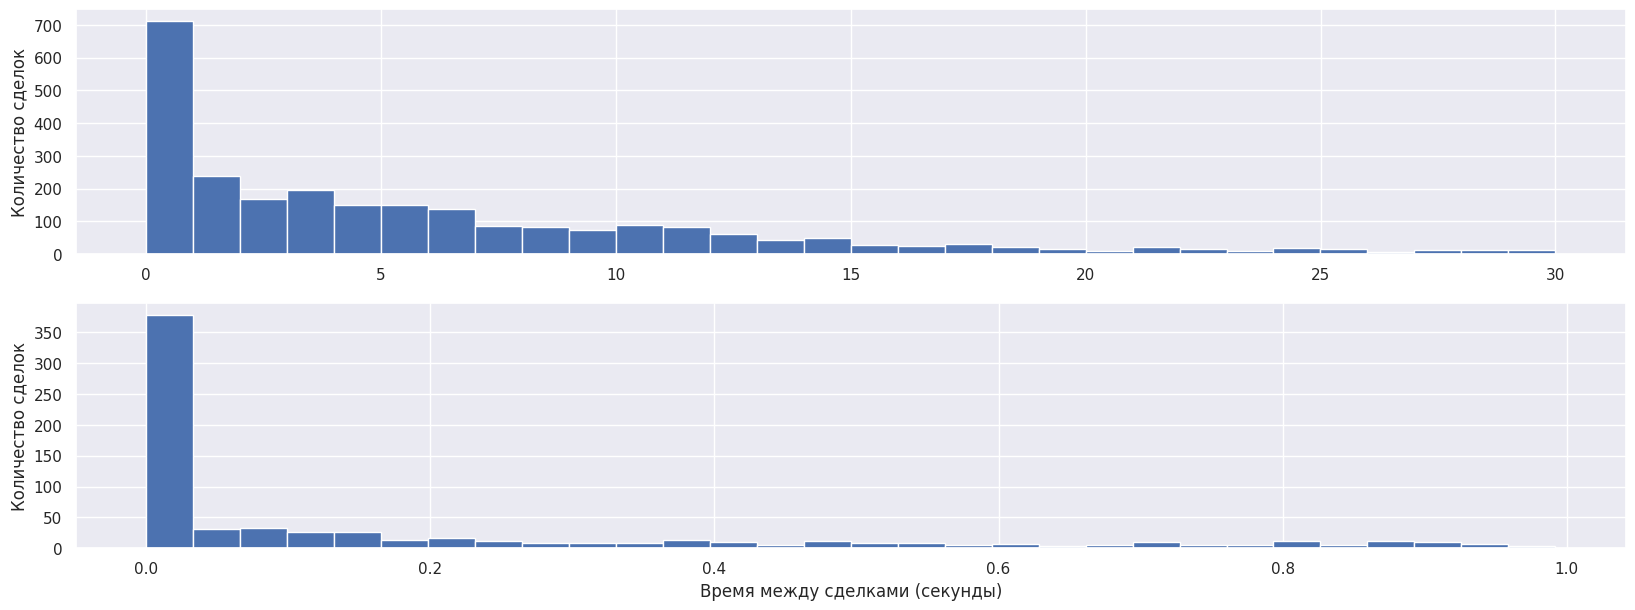

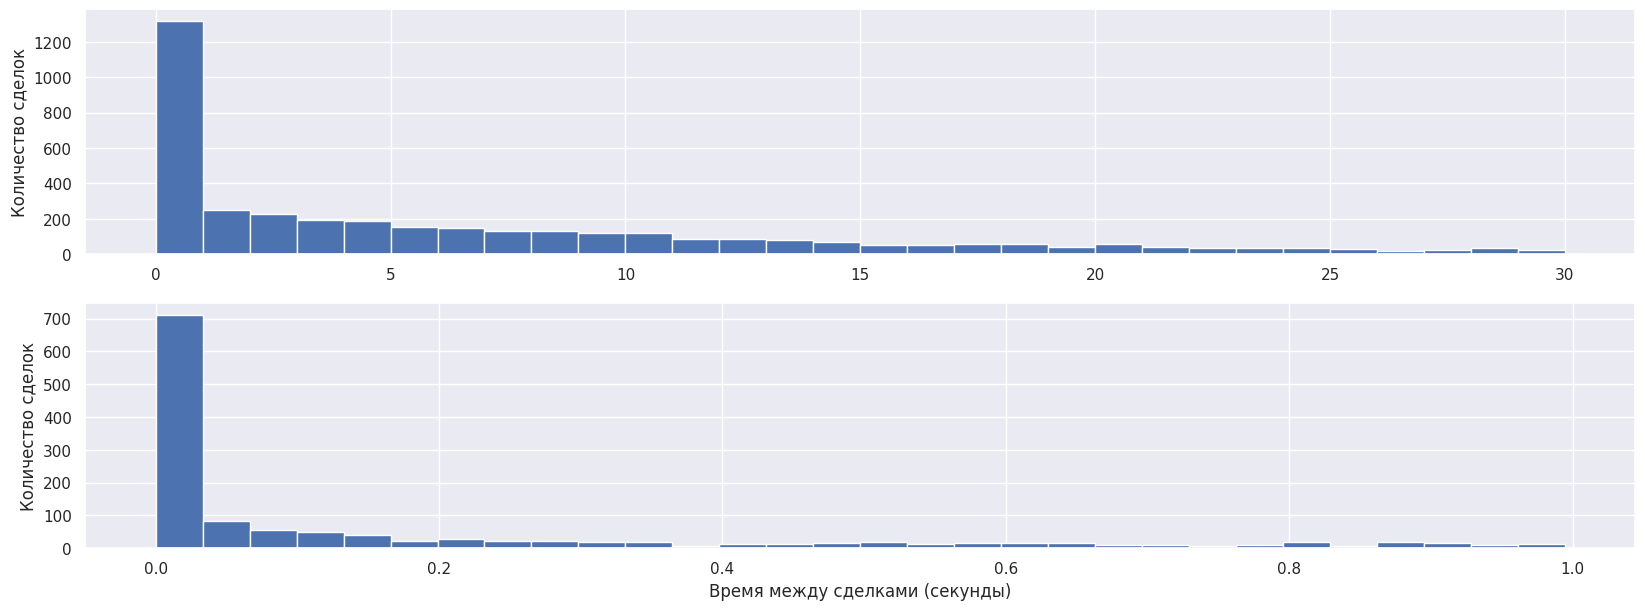

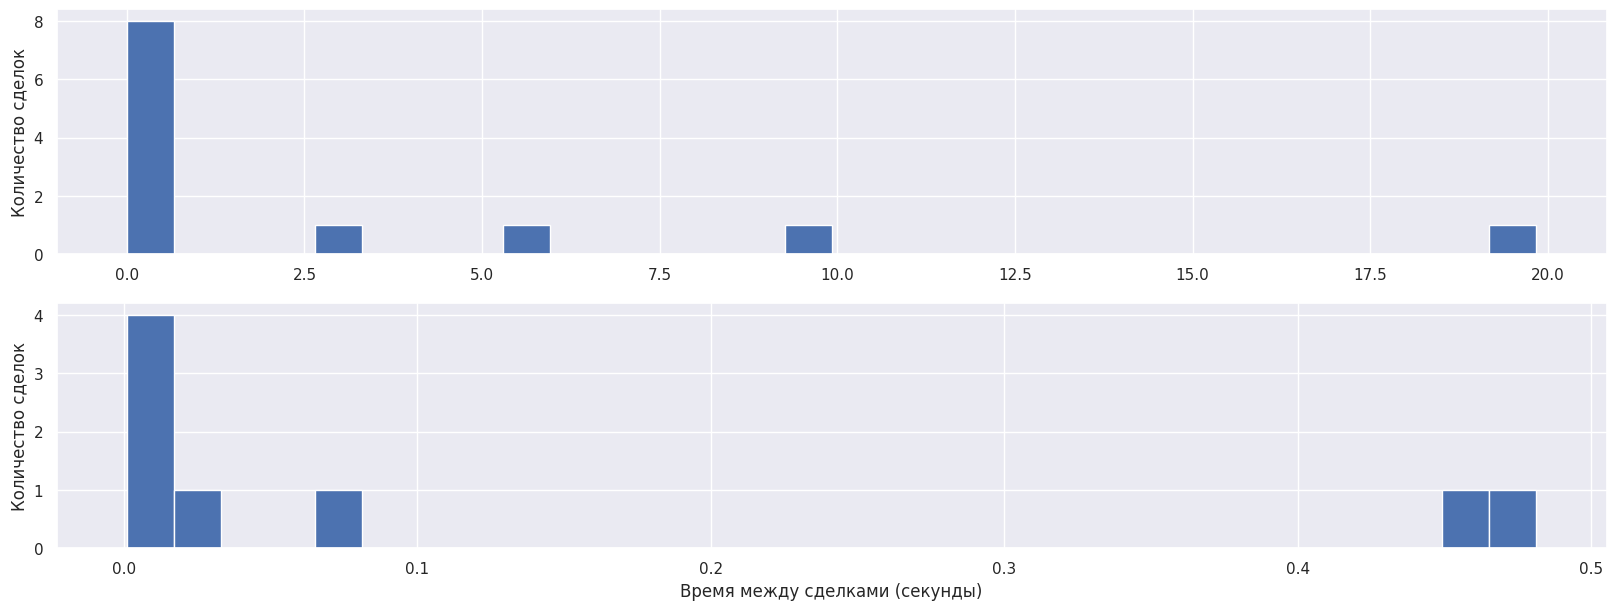

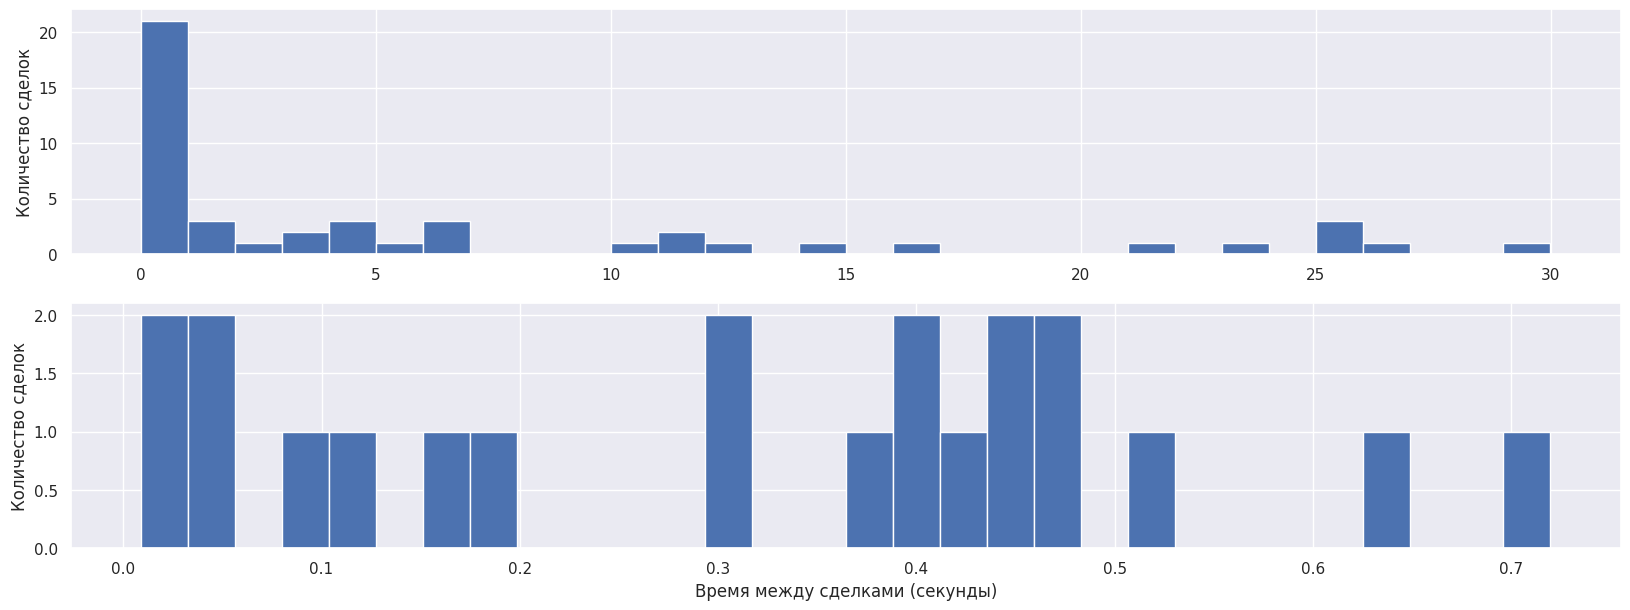

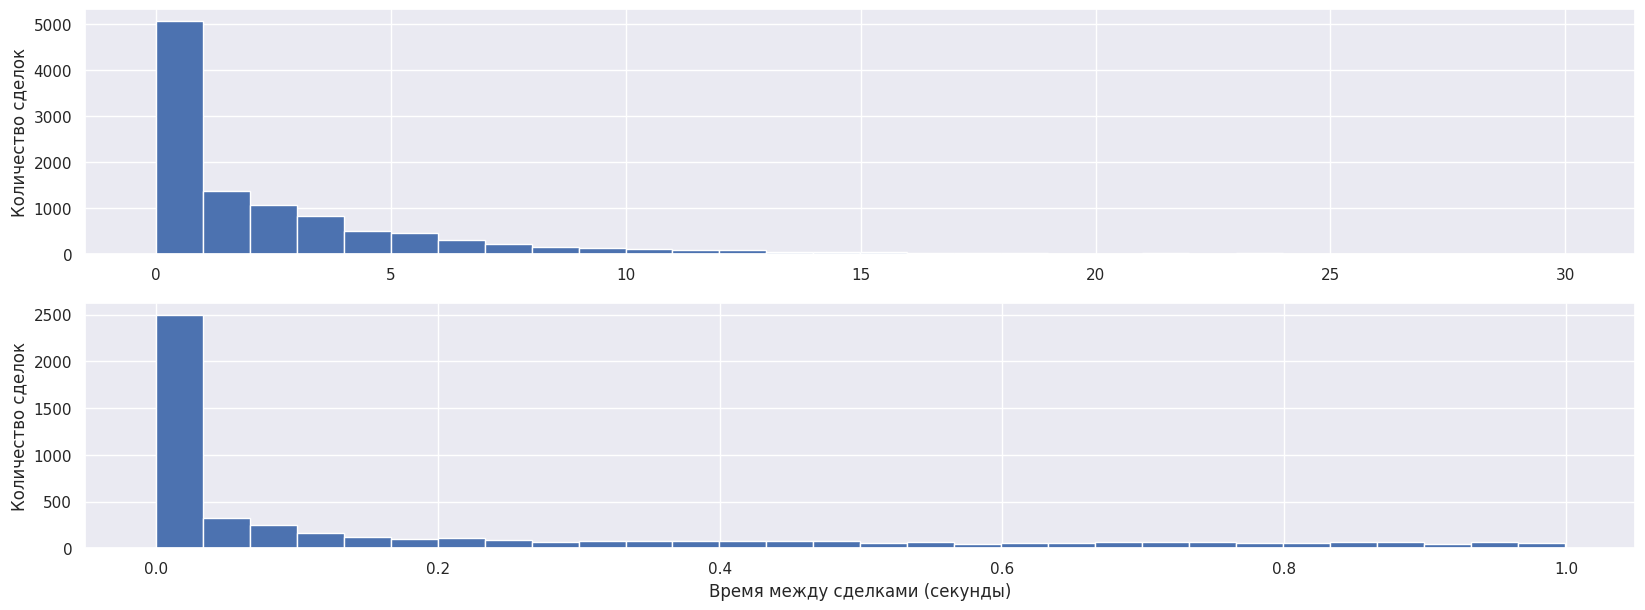

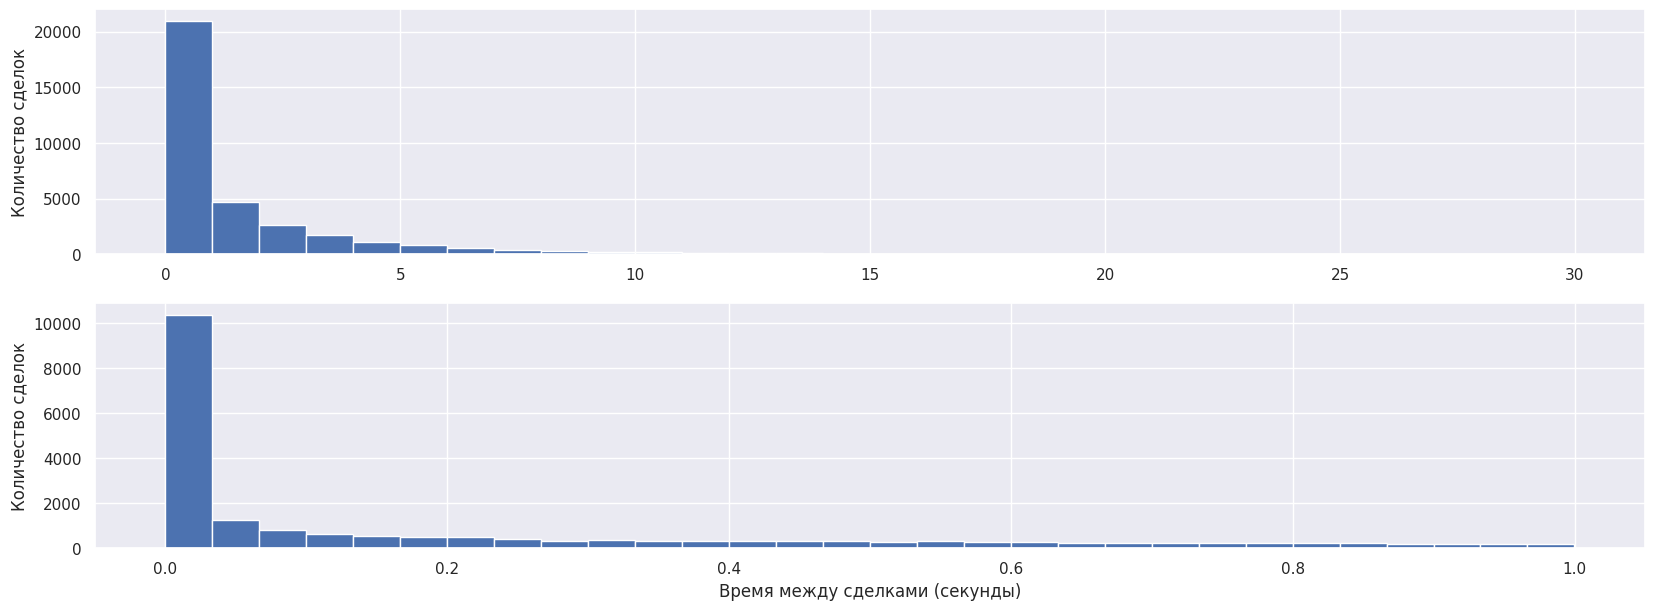

In [54]:
sns.set(rc = {"figure.figsize":(20, 7)})
directory = "data/CU/03.03.2021/"
 
files = os.listdir(directory)

listQuadras = []

for file in files:
    if(file.endswith(".csv")):
        # print("data/"+file)
        df = pd.read_csv(directory + file)
        fig, axs = plt.subplots(nrows= 2, ncols= 1 )
        dts = abs(np.diff(df["Time"]))

        #add title
        # fig. suptitle('Распределение времени между соседними ордерами для ' + file[:-4])

        axs[0].hist(dts[dts < 30], bins=30)
        axs[0].set_ylabel("Количество сделок")
        axs[1].hist(dts[dts < 1], bins=30)

        plt.xlabel("Время между сделками (секунды)")
        plt.ylabel("Количество сделок")
        plt.savefig(file[:-6] + ".pdf")

In [58]:
dummy_first = np.array((df["Time"] < 3600)[1:-2], dtype=float)
print(dummy_first)

[1. 1. 1. ... 0. 0. 0.]


In [19]:
len(df[df["AskAfter"] - df["AskBefore"] > 0])

2250

In [20]:
len(df)

41963

In [80]:
def df_OLS_anal_AO(df: pd.DataFrame):
    deltaA = np.array(df["AskAfter"] - df["AskBefore"])[1:-1]
    deltat = np.array(np.diff(df["Time"]))[1:]
    x = np.array(df["Volume"][1:-1])

    dA = np.array(deltaA / deltat)
    dx = np.array(x / deltat)
    ddx = np.array(np.diff(dx))
    ddA = np.array(np.diff(dA))

    OLSdf = pd.DataFrame({
        "SUM": ddA,
        "-rho": deltaA[:-1],
        "-rho kappa": x[1:],
        "rho (lambda + kappa)": x[:-1],
        "kappa + lambda": ddx
    })

    Regressand = OLSdf["SUM"]

    Regressors = OLSdf[["-rho", "-rho kappa", "rho (lambda + kappa)", "kappa + lambda"]]

    # Regressors = sm.add_constant(Regressors, prepend=False)

    model = OLS(Regressand, Regressors)

    res = model.fit()

    print(res.summary()) 

    rho = - res.params.iloc[0]
    kappa = - res.params.iloc[1] / rho
    lamb = res.params.iloc[2] / rho - kappa
    # lamb2 = res.params.iloc[3] - kappa
    

    print("rho = ", rho, "\nlambda = ", lamb, "\nkappa = ", kappa, "\n \n", end="")

In [94]:
df = pd.read_csv("data/SE/GAZPWP.csv")
dts = np.diff(df["Time"])

def f(x):
    return 0.2 - sum(dts * (1 - np.exp(-dts * x))) / 151176 - 31240

print(sum(dts * dts))
print(sum(dts) / sum(dts * dts))
# plt.hist(dts[dts < 5])
# df_OLS_anal2(df)
f(0)

151176.5976136651
0.20636792492689998


-31239.8